In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
import seaborn as sns
plt.style.use('seaborn')
# Figures inline and set visualization style
%matplotlib inline


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
X = np.load('np/SMOTE_X_train.npy')
y = np.load('np/SMOTE_y_train.npy')
X_test = np.load('np/X_test.npy')

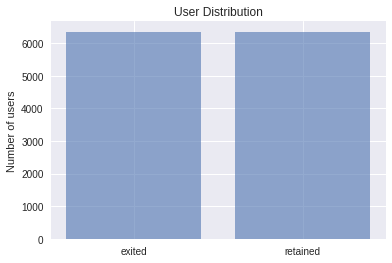

In [3]:
plt.figure()
plt.bar(['exited', 'retained'], [sum(y), len(y) - sum(y)], align='center', alpha = 0.6)
plt.ylabel('Number of users')
plt.title('User Distribution')
plt.show()

By using SMOTE, classes have been balanced

In [3]:
X[:,7] = X[:,7].astype('int64')
X_test[:,7] = X_test[:,7].astype('int64')

male = sum(X[:,7])
female = len(y) - male

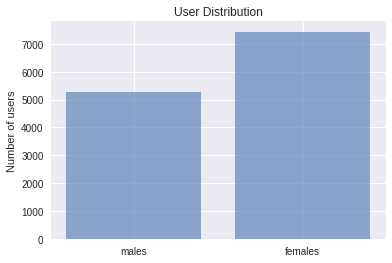

In [5]:
plt.figure()
plt.bar(['males', 'females'], [male, female], align='center', alpha = 0.6)
plt.ylabel('Number of users')
plt.title('User Distribution')
plt.show()

There are more female customers

In [4]:
f_exits, m_exits = 0, 0
n = len(y)
for i in range(n):
    if X[i,7] == 0:
        if y[i] ==1:
            f_exits +=1
    else:
        if y[i] == 1:
            m_exits +=1

In [7]:
f_exits_perc = f_exits/female * 100
f_exits_perc

63.44938835865036

In [8]:
m_exits_perc = m_exits/male * 100
m_exits_perc

31.025981414754412

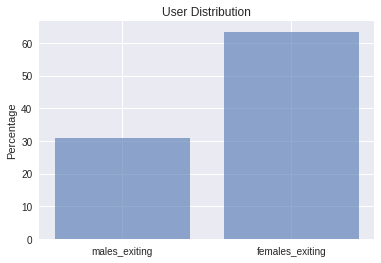

In [9]:
plt.figure()
plt.bar(['males_exiting', 'females_exiting'], [m_exits_perc, f_exits_perc], align='center', alpha = 0.6)
plt.ylabel('Percentage')
plt.title('User Distribution')
plt.show()

Women are more prone to leaving banks

In [4]:
X[:,8] = X[:,8].astype('int64')
X_test[:,8] = X_test[:,8].astype('int64')

In [11]:
min_age = min(X[:,8])
min_age

18.0

In [12]:
max_age = max(X[:,8])
max_age

92.0

We will check how FICO's assumption holds w.r.t. our dataset  
For this, is_age between 25-34 colomn has to be checked  
From Feature Engineering file, we can see that is_age colomn is indexed 15th

In [5]:
mill_exits, nm_exits = 0, 0
n = len(y)
for i in range(n):
    if X[i,15] == 0:
        if y[i] ==1:
            nm_exits +=1
    else:
        if y[i] == 1:
            mill_exits +=1
            
mill = sum(X[:,15])
nm = n - mill

In [14]:
mills_perc = mill_exits/mill * 100
mills_perc

40.88152682248365

In [15]:
nm_perc = nm_exits/nm * 100
nm_perc

53.013920060491415

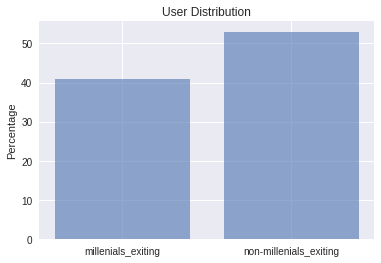

In [16]:
plt.figure()
plt.bar(['millenials_exiting', 'non-millenials_exiting'], [mills_perc, nm_perc], align='center', alpha = 0.6)
plt.ylabel('Percentage')
plt.title('User Distribution')
plt.show()

That's why EDA is so important, we engineered a feature which was made on FICO's report and that report turns out to be irrelevant for us!  
Next step, remove this feature

In [6]:
X = np.delete(X, 15, 1)
X_test = np.delete(X_test, 15, 1)

In [7]:
X.shape

(12712, 16)

In [8]:
X_test.shape

(2000, 16)

Checking if a particular age group is more prone to exits

In [19]:
age_exits = np.zeros((93,))
total_age_exits = np.zeros((93,))

for i in range(n):
    if y[i]==1:
        age_exits[int(X[i,8])] += 1
        
    total_age_exits[int(X[i,8])] += 1
    
perc = age_exits/total_age_exits * 100
perc[:17] = 0

/home/shivang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


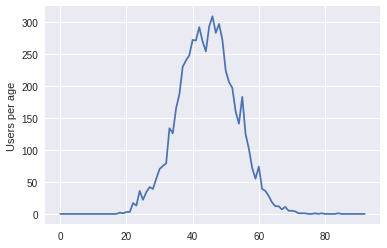

In [20]:
plt.figure()
plt.plot(age_exits)
plt.ylabel('Users per age')
plt.show()

In [21]:
perc = np.nan_to_num(perc)

In [22]:
perc

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  11.11111111,   4.54545455,
         8.57142857,   6.66666667,  22.66666667,  14.13043478,
        29.50819672,  15.94202899,  18.47826087,  20.58823529,
        16.31799163,  17.29559748,  22.43589744,  19.73684211,
        20.57291667,  29.97762864,  27.57111597,  33.19919517,
        36.5234375 ,  40.42179262,  42.47787611,  46.96969697,
        51.12781955,  54.2       ,  59.95893224,  60.94808126,
        63.65914787,  71.99017199,  74.81840194,  78.61111111,
        82.0441989 ,  81.68168168,  82.35294118,  82.73092369,
        86.78414097,  86.02150538,  83.92857143,  86.32075472,
        88.65248227,  76.69172932,  69.90291262,  68.75      ,
        74.        ,  60.9375    ,  60.        ,  68.29

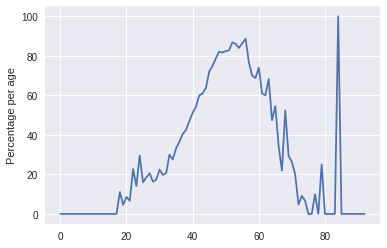

In [23]:
plt.figure()
plt.plot(perc)
plt.ylabel('Percentage per age')
plt.show()

Leaving percentages are very high between 40 - 60, this age group also has the most number of people  
Add a feature is_age

In [9]:
is_age = np.zeros((n,))
lb = X[:,8] >= 40
ub = X[:,8] <= 60
valid = lb == ub
is_age[valid] = 1

is_age_test = np.zeros((2000,))
lb = X_test[:,8] >= 40
ub = X_test[:,8] <= 60
valid = lb == ub
is_age_test[valid] = 1

Verifying colomn creation

In [10]:
print(is_age[:5])
print(X[:5,8])

print(is_age_test[:5])
print(X_test[:5,8])

[0. 1. 0. 0. 1.]
[32. 42. 24. 27. 56.]
[0. 1. 1. 1. 0.]
[32. 43. 44. 59. 27.]


In [11]:
X = np.insert(X, -1, values = is_age, axis = 1)
X.shape

(12712, 17)

In [12]:
X_test = np.insert(X_test, -1, values = is_age_test, axis = 1)
X_test.shape

(2000, 17)

In [13]:
X[:5,15]

array([0., 1., 0., 0., 1.])

Is_age is the 15th colomn

#### Creating a dataframe for further visualizations with seaborn

In [13]:
import pandas as pd
sns.set()

In [14]:
df = pd.DataFrame(X, columns = ['spanish','german','c1','c2','c3','c4','credit_score','gender','age','tenure','balance','products','has_card','active','has_balance','is_age','salary'])

df_test = pd.DataFrame(X_test, columns = ['spanish','german','c1','c2','c3','c4','credit_score','gender','age','tenure','balance','products','has_card','active','has_balance','is_age','salary'])

In [16]:
df.head()

,spanish,german,c1,c2,c3,c4,credit_score,gender,age,tenure,balance,products,has_card,active,has_balance,is_age,salary
0,0.0,1.0,0.0,0.0,0.0,0.0,686.0,1.0,32.0,6.0,0.00,2.0,1.0,1.0,0.0,0.0,179093.26
1,1.0,0.0,0.0,0.0,1.0,0.0,632.0,1.0,42.0,4.0,119624.60,2.0,1.0,1.0,1.0,1.0,195978.86
2,0.0,0.0,0.0,0.0,0.0,1.0,559.0,1.0,24.0,3.0,114739.92,1.0,1.0,0.0,1.0,0.0,85891.02
3,0.0,0.0,0.0,0.0,0.0,0.0,561.0,0.0,27.0,9.0,135637.00,1.0,1.0,0.0,1.0,0.0,153080.40
4,0.0,0.0,0.0,0.0,0.0,0.0,517.0,1.0,56.0,9.0,142147.32,1.0,0.0,0.0,1.0,1.0,39488.04


In [15]:
df['exited'] = y
df_test['exited'] = np.load('np/y_test.npy')

In [18]:
df.head()

,spanish,german,c1,c2,c3,c4,credit_score,gender,age,tenure,balance,products,has_card,active,has_balance,is_age,salary,exited
0,0.0,1.0,0.0,0.0,0.0,0.0,686.0,1.0,32.0,6.0,0.00,2.0,1.0,1.0,0.0,0.0,179093.26,0
1,1.0,0.0,0.0,0.0,1.0,0.0,632.0,1.0,42.0,4.0,119624.60,2.0,1.0,1.0,1.0,1.0,195978.86,0
2,0.0,0.0,0.0,0.0,0.0,1.0,559.0,1.0,24.0,3.0,114739.92,1.0,1.0,0.0,1.0,0.0,85891.02,1
3,0.0,0.0,0.0,0.0,0.0,0.0,561.0,0.0,27.0,9.0,135637.00,1.0,1.0,0.0,1.0,0.0,153080.40,1
4,0.0,0.0,0.0,0.0,0.0,0.0,517.0,1.0,56.0,9.0,142147.32,1.0,0.0,0.0,1.0,1.0,39488.04,1


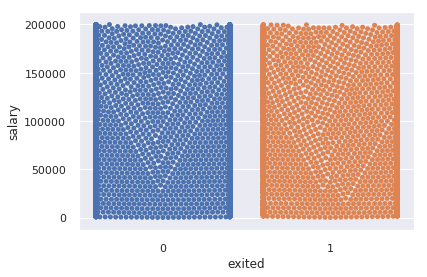

In [33]:
sns.swarmplot(x='exited', y='salary', data=df)

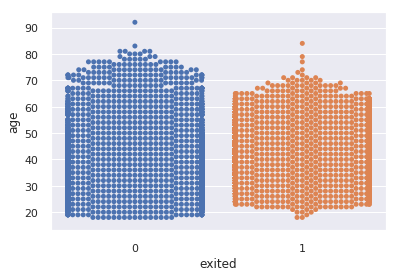

In [49]:
sns.swarmplot(x='exited', y='age', data=df)

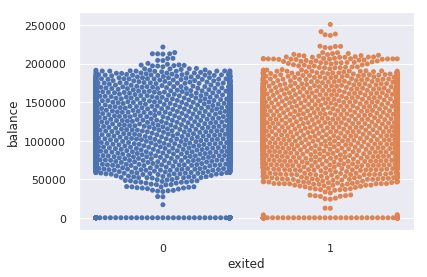

In [50]:
sns.swarmplot(x='exited', y='balance', data=df)

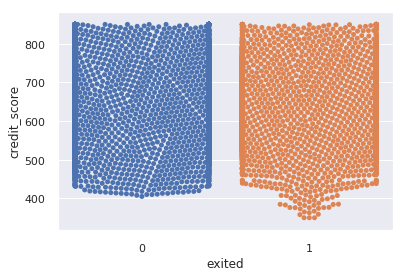

In [53]:
sns.swarmplot(x='exited', y='credit_score', data=df)

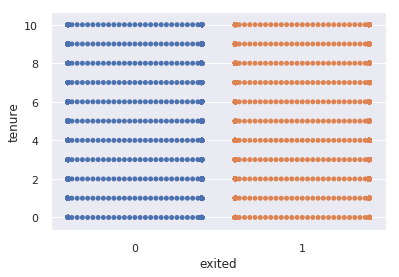

In [21]:
df['tenure'] = df['tenure'].astype('int64')
sns.swarmplot(x='exited', y='tenure', data=df)

Exited vs Salary plot -> does not show any clear patterns  
Exited vs Age plot -> People in the middle stages of their life leave bank more often, elderly people refrain from leaving their banks  
Exited vs Balance plot -> People with very high or very low balance are more likely to leave the bank  
Exited vs credit score -> No suprises, low credit score leads to people changing their banks  
Exited vs tenure -> Tenure has nothing to do with exiting

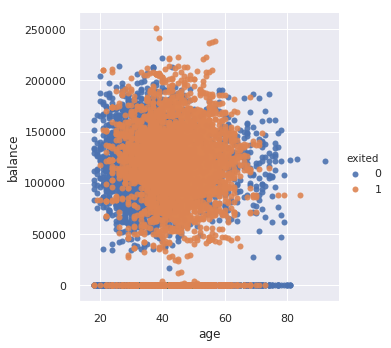

In [34]:
sns.lmplot(x='age', y='balance', hue='exited', data=df, fit_reg=False, scatter_kws={'alpha':0.9})

No correlation  
Next, age vs salary colored by exited

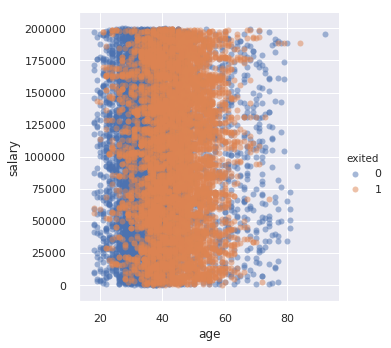

In [36]:
sns.lmplot(x='age', y='salary', hue='exited', data=df, fit_reg=False, scatter_kws={'alpha':0.5})

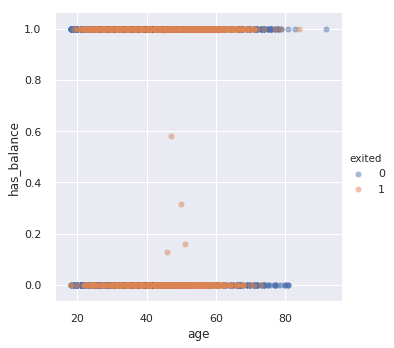

In [37]:
sns.lmplot(x='age', y='has_balance', hue='exited', data=df, fit_reg=False, scatter_kws={'alpha':0.5})

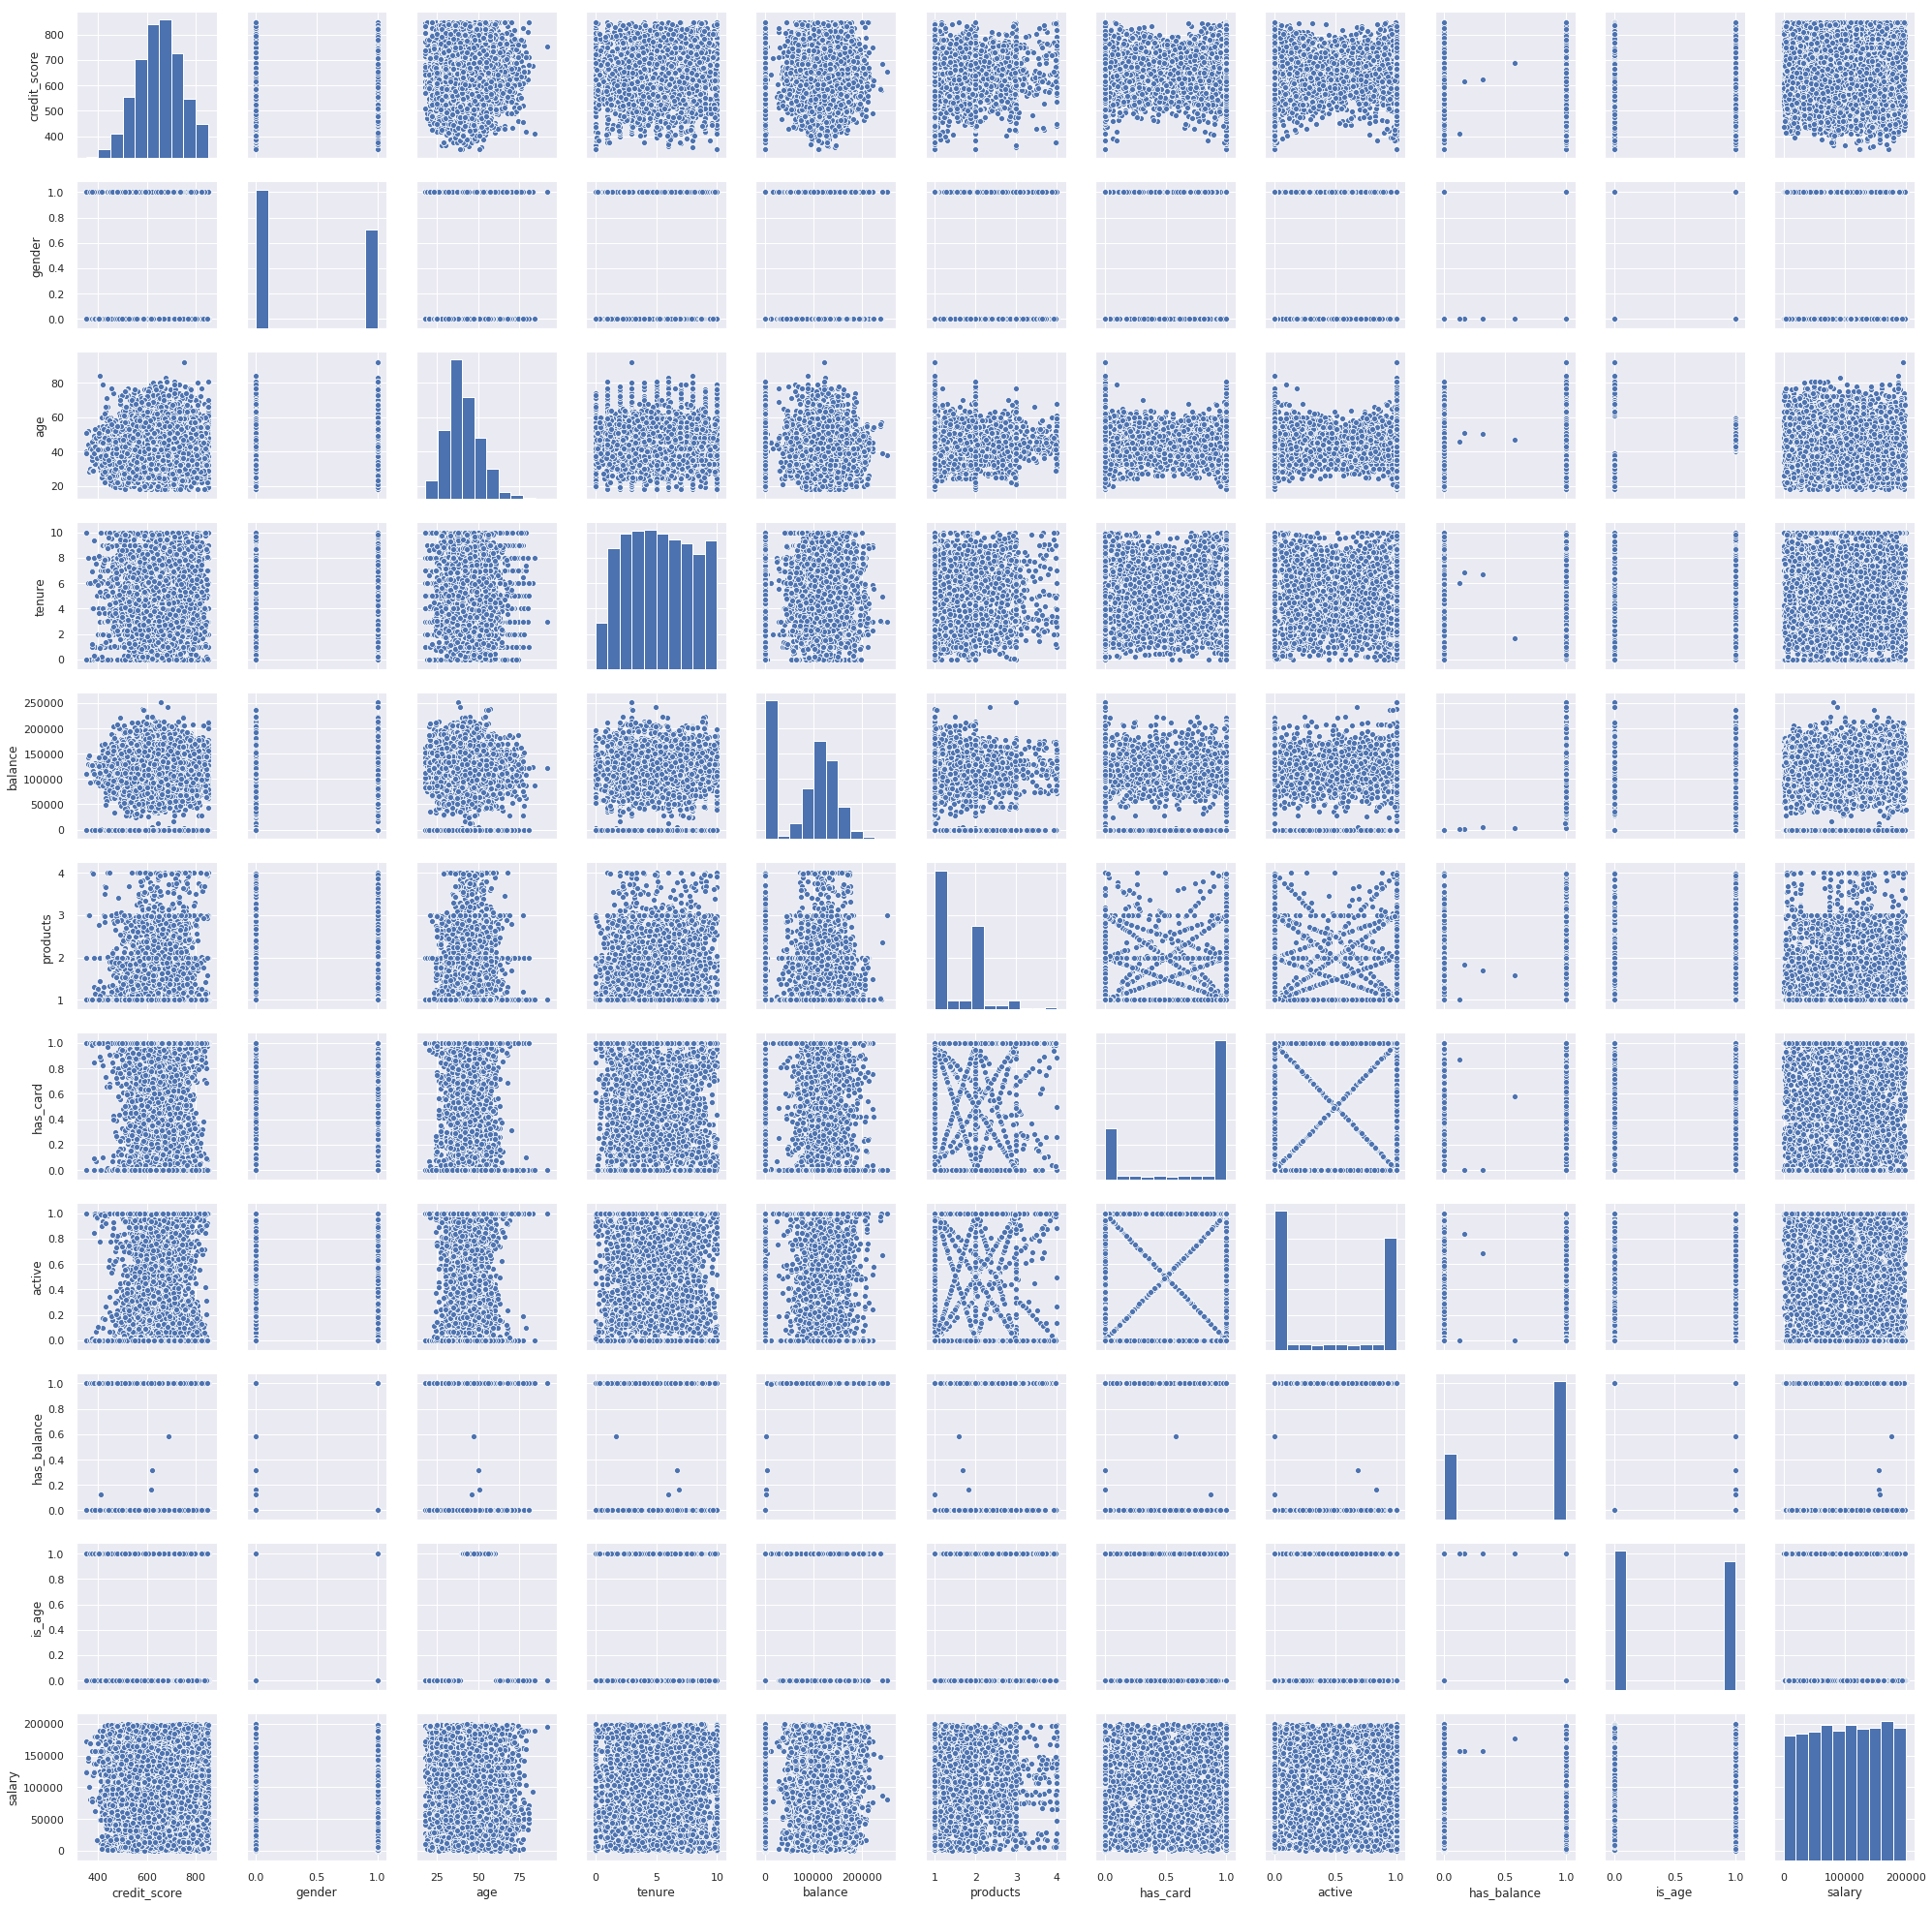

In [42]:
sns.pairplot(df.iloc[:,6:-1]);

Credit score is normally distributed, relationships are not clear  
Next, spearman test as correlations seem non-linear

In [23]:
from numpy.random import seed
from scipy.stats import spearmanr

seed(1)

corr,_ = spearmanr(df)

In [24]:
corr

array([[ 1.00000000e+00, -3.73475793e-01, -2.50610234e-01,
        -1.79871306e-01,  1.50250090e-02,  2.03259161e-02,
        -2.28400794e-01, -1.94160209e-02,  3.14660395e-02,
         1.21633631e-03,  3.30919815e-03, -5.29992446e-03,
         6.52062086e-03, -4.53473594e-03, -6.32264026e-04,
         3.26337381e-02, -1.12926787e-02,  6.13746632e-02],
       [-3.73475793e-01,  1.00000000e+00, -1.90787004e-01,
        -1.40050062e-01, -7.22082611e-03,  2.66679892e-02,
         3.60681624e-01, -2.01322245e-02,  2.81165914e-02,
        -3.62369294e-02, -1.55928757e-03, -2.22124805e-02,
        -1.57475817e-02,  2.70186657e-03,  1.82083265e-04,
         3.02086356e-02,  1.18320979e-02,  4.92869089e-02],
       [-2.50610234e-01, -1.90787004e-01,  1.00000000e+00,
        -9.31997598e-02,  5.97252694e-02, -1.28394260e-02,
         4.52150465e-01, -1.14655547e-02,  2.80607921e-02,
         1.11102579e-02,  4.12210223e-02, -2.75858058e-02,
         1.02668355e-02, -3.48976810e-03,  3.57467302e

In [27]:
col1, col2, val = [], [], []
for i in range(18):
    for j in range(18):
        if corr[i,j] >= 0.5:
            col1.append(i+1)
            col2.append(j+1)
            val.append(corr[i,j])
        if corr[i,j] <= -0.5:
            col1.append(i+1)
            col2.append(j+1)
            val.append(corr[i,j])

In [29]:
len(col1)

24

In [35]:
keys = list(df.keys())
keys

['spanish',
 'german',
 'c1',
 'c2',
 'c3',
 'c4',
 'credit_score',
 'gender',
 'age',
 'tenure',
 'balance',
 'products',
 'has_card',
 'active',
 'has_balance',
 'is_age',
 'salary',
 'exited']

In [37]:
for i in range(24):
    print('Notable correlation number {} is from colomns {} and {}, value of this correlation is {}'
          .format(i+1, keys[col1[i] - 1], keys[col2[i] -1], val[i] ))

Notable correlation number 1 is from colomns spanish and spanish, value of this correlation is 0.9999999999999999
Notable correlation number 2 is from colomns german and german, value of this correlation is 1.0
Notable correlation number 3 is from colomns c1 and c1, value of this correlation is 1.0
Notable correlation number 4 is from colomns c2 and c2, value of this correlation is 1.0
Notable correlation number 5 is from colomns c3 and c3, value of this correlation is 0.9999999999999999
Notable correlation number 6 is from colomns c3 and has_balance, value of this correlation is 0.5087362746790208
Notable correlation number 7 is from colomns c4 and c4, value of this correlation is 1.0
Notable correlation number 8 is from colomns credit_score and credit_score, value of this correlation is 1.0
Notable correlation number 9 is from colomns gender and gender, value of this correlation is 1.0
Notable correlation number 10 is from colomns age and age, value of this correlation is 1.0
Notable

Strongly correlated variables are:
* age and is_age
* balance and has_balance

/home/shivang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/shivang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/shivang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/shivang/.loca

Done


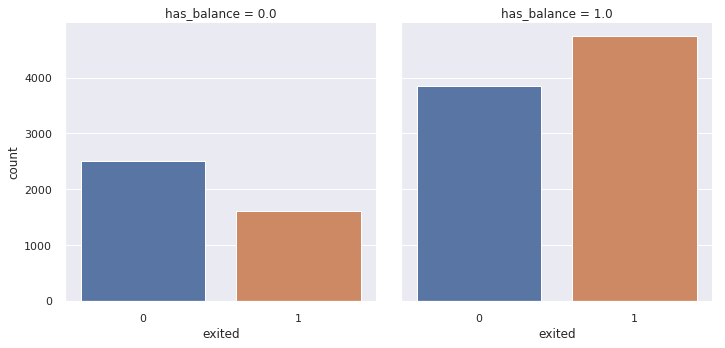

In [16]:
df['has_balance'] = df['has_balance'].astype('int64')
df_test['has_balance'] = df_test['has_balance'].astype('int64')

sns.catplot(x='exited', col='has_balance', kind='count', data=df)

My hypothesis that accounts with no balance close more often is wrong and its the vice versa  


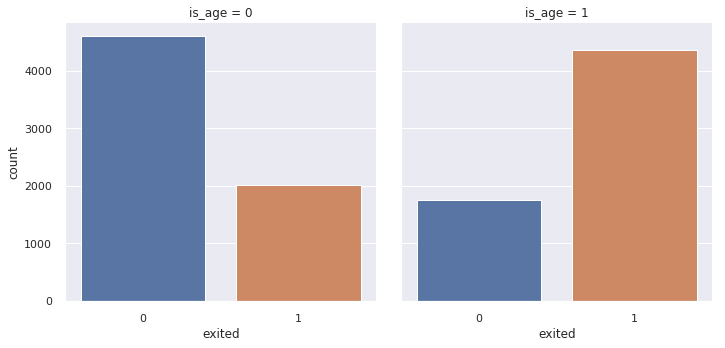

In [59]:
df['is_age'] = df['is_age'].astype('int64')
df_test['is_age'] = df_test['is_age'].astype('int64')

sns.catplot(x='exited', col='is_age', kind='count', data=df)

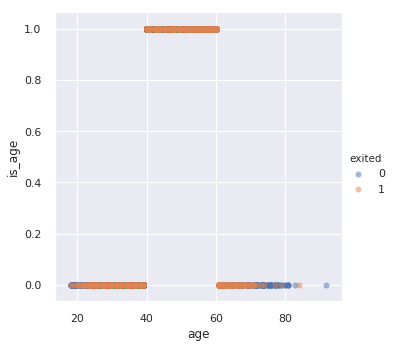

In [49]:
sns.lmplot(x='age', y='is_age', hue='exited', data=df, fit_reg=False, scatter_kws={'alpha':0.5})

In [50]:
corrd,_ = spearmanr(df['exited'],df['is_age'])

In [51]:
corrdep,_ = spearmanr(df['exited'],df['age'])

In [52]:
corrd

0.40890420686028606

In [53]:
corrdep

0.4170493647411304

There isn't much difference between the two variables

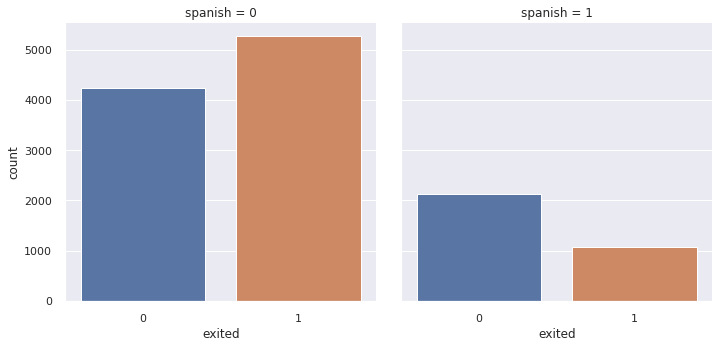

In [60]:
df['spanish'] = df['spanish'].astype('int64')
df_test['spanish'] = df_test['spanish'].astype('int64')


sns.catplot(x='exited', col='spanish', kind='count', data=df)

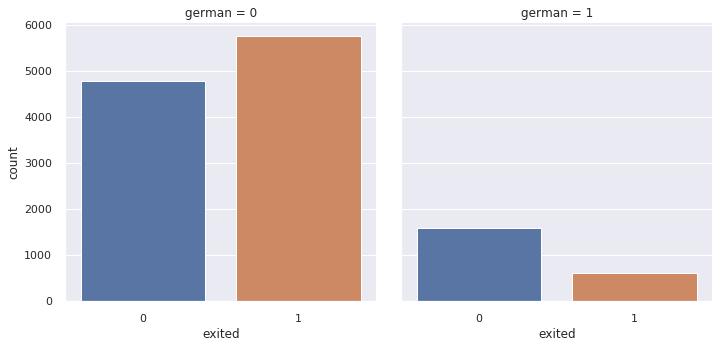

In [61]:
df['german'] = df['german'].astype('int64')
sns.catplot(x='exited', col='german', kind='count', data=df)

Being french means leaving the bank more often but its values are encoded in spanish and german colomns, so these two colomns are important

In [22]:
df['c1'], df['c2'], df['c3'], df['c4'] = 0,0,0,0 
for i in range(df.shape[0]):
    if df['credit_score'][i] >= 580 and df['credit_score'][i] <= 669:
        df['c1'][i] = 1
    elif df['credit_score'][i] >= 670 and df['credit_score'][i] <= 739:
        df['c2'][i] = 1
    elif df['credit_score'][i] >= 740 and df['credit_score'][i] <= 799:
        df['c3'][i] = 1
    elif df['credit_score'][i] >= 800:
        df['c4'][i] = 1

/home/shivang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/shivang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/shivang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/shivang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopy

In [23]:
df.head()

,spanish,german,c1,c2,c3,c4,credit_score,gender,age,tenure,balance,products,has_card,active,has_balance,is_age,salary,exited
0,0.0,1.0,0,1,0,0,686.0,1.0,32.0,6.0,0.00,2.0,1.0,1.0,0.0,0.0,179093.26,0
1,1.0,0.0,1,0,0,0,632.0,1.0,42.0,4.0,119624.60,2.0,1.0,1.0,1.0,1.0,195978.86,0
2,0.0,0.0,0,0,0,0,559.0,1.0,24.0,3.0,114739.92,1.0,1.0,0.0,1.0,0.0,85891.02,1
3,0.0,0.0,0,0,0,0,561.0,0.0,27.0,9.0,135637.00,1.0,1.0,0.0,1.0,0.0,153080.40,1
4,0.0,0.0,0,0,0,0,517.0,1.0,56.0,9.0,142147.32,1.0,0.0,0.0,1.0,1.0,39488.04,1


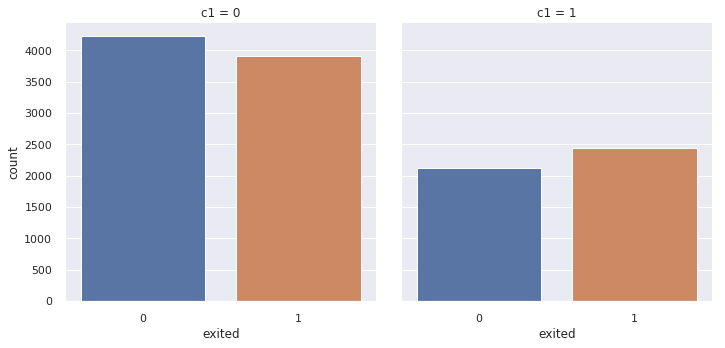

In [24]:
df['c1'] = df['c1'].astype('int64')
df_test['c1'] = df_test['c1'].astype('int64')

sns.catplot(x='exited', col='c1', kind='count', data=df)

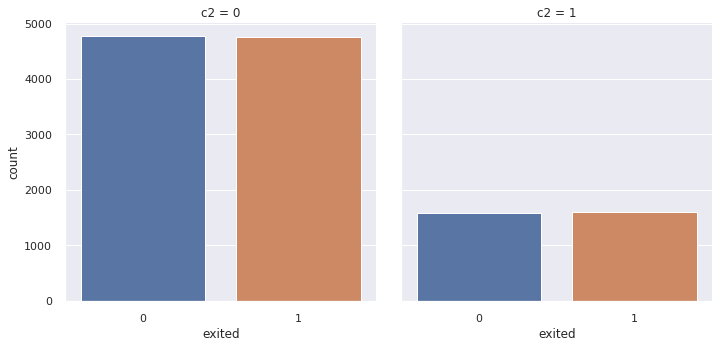

In [25]:
df['c2'] = df['c2'].astype('int64')
df_test['c2'] = df_test['c2'].astype('int64')

sns.catplot(x='exited', col='c2', kind='count', data=df)

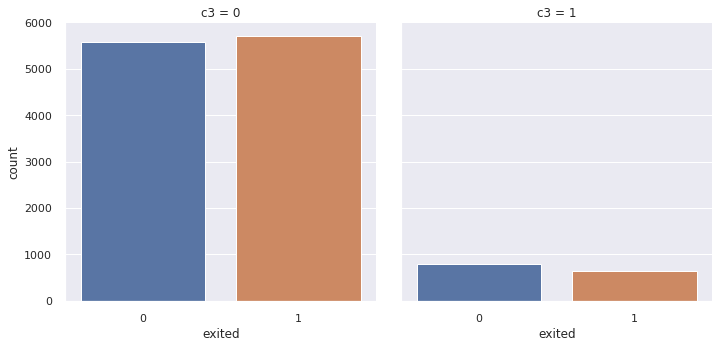

In [26]:
df['c3'] = df['c3'].astype('int64')
df_test['c3'] = df_test['c3'].astype('int64')


sns.catplot(x='exited', col='c3', kind='count', data=df)

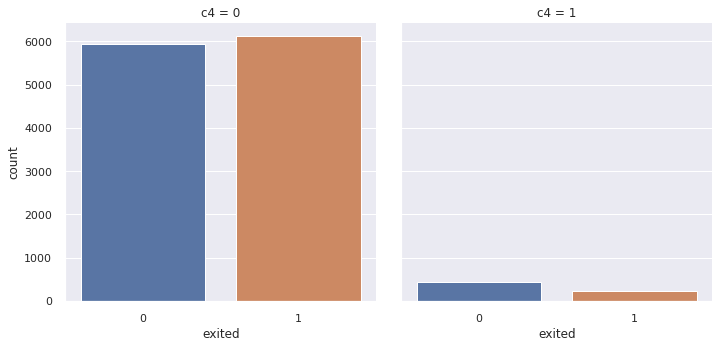

In [27]:
df['c4'] = df['c4'].astype('int64')
df_test['c4'] = df_test['c4'].astype('int64')

sns.catplot(x='exited', col='c4', kind='count', data=df)

People with poor and very good credit score grades leave the bank more often  
Poor colomn was removed earlier for prevention against dummy variable attack

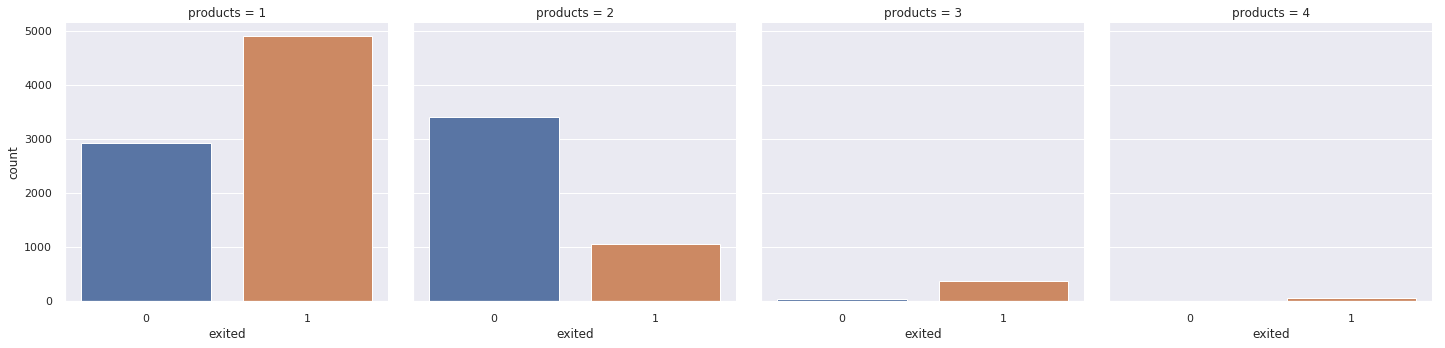

In [28]:
df['products'] = df['products'].astype('int64')
df_test['products'] = df_test['products'].astype('int64')
sns.catplot(x='exited', col='products', kind='count', data=df)

People with only one product leave bank more often, same is the case with people having three products

In [29]:
dummies = pd.get_dummies(df['products'],prefix='p')

dummies_test = pd.get_dummies(df_test['products'],prefix='p')

In [30]:
df = pd.concat([df,dummies], axis=1)
df_test = pd.concat([df_test,dummies_test], axis=1)

In [31]:
df.head()

,spanish,german,c1,c2,c3,c4,credit_score,gender,age,tenure,...,has_card,active,has_balance,is_age,salary,exited,p_1,p_2,p_3,p_4
0,0.0,1.0,0,1,0,0,686.0,1.0,32.0,6.0,...,1.0,1.0,0.0,0.0,179093.26,0,0,1,0,0
1,1.0,0.0,1,0,0,0,632.0,1.0,42.0,4.0,...,1.0,1.0,1.0,1.0,195978.86,0,0,1,0,0
2,0.0,0.0,0,0,0,0,559.0,1.0,24.0,3.0,...,1.0,0.0,1.0,0.0,85891.02,1,1,0,0,0
3,0.0,0.0,0,0,0,0,561.0,0.0,27.0,9.0,...,1.0,0.0,1.0,0.0,153080.40,1,1,0,0,0
4,0.0,0.0,0,0,0,0,517.0,1.0,56.0,9.0,...,0.0,0.0,1.0,1.0,39488.04,1,1,0,0,0


In [32]:
df = df.iloc[:,:-1]
df.head()

,spanish,german,c1,c2,c3,c4,credit_score,gender,age,tenure,...,products,has_card,active,has_balance,is_age,salary,exited,p_1,p_2,p_3
0,0.0,1.0,0,1,0,0,686.0,1.0,32.0,6.0,...,2,1.0,1.0,0.0,0.0,179093.26,0,0,1,0
1,1.0,0.0,1,0,0,0,632.0,1.0,42.0,4.0,...,2,1.0,1.0,1.0,1.0,195978.86,0,0,1,0
2,0.0,0.0,0,0,0,0,559.0,1.0,24.0,3.0,...,1,1.0,0.0,1.0,0.0,85891.02,1,1,0,0
3,0.0,0.0,0,0,0,0,561.0,0.0,27.0,9.0,...,1,1.0,0.0,1.0,0.0,153080.40,1,1,0,0
4,0.0,0.0,0,0,0,0,517.0,1.0,56.0,9.0,...,1,0.0,0.0,1.0,1.0,39488.04,1,1,0,0


In [33]:
df_test = df_test.iloc[:,:-1]
df_test.head()

,spanish,german,c1,c2,c3,c4,credit_score,gender,age,tenure,...,products,has_card,active,has_balance,is_age,salary,exited,p_1,p_2,p_3
0,1.0,0.0,0,0,1,0,596.0,1.0,32.0,3.0,...,2,0.0,0.0,1.0,0.0,41788.37,0,0,1,0
1,1.0,0.0,0,0,0,0,623.0,1.0,43.0,1.0,...,2,1.0,1.0,0.0,1.0,146379.30,0,0,1,0
2,1.0,0.0,0,0,0,1,601.0,0.0,44.0,4.0,...,2,1.0,0.0,0.0,1.0,58561.31,0,0,1,0
3,0.0,0.0,0,0,1,0,506.0,1.0,59.0,8.0,...,2,1.0,1.0,1.0,1.0,170679.74,0,0,1,0
4,0.0,0.0,0,0,0,1,560.0,0.0,27.0,7.0,...,1,1.0,1.0,1.0,0.0,114669.79,0,1,0,0


Salary, tenure, is_age, has_balance will be removed

In [34]:
df = df.drop(['salary', 'tenure', 'has_balance', 'is_age', 'products'], axis = 1)

df_test = df_test.drop(['salary', 'tenure', 'has_balance', 'is_age', 'products'], axis = 1)

In [35]:
df.head()

,spanish,german,c1,c2,c3,c4,credit_score,gender,age,balance,has_card,active,exited,p_1,p_2,p_3
0,0.0,1.0,0,1,0,0,686.0,1.0,32.0,0.00,1.0,1.0,0,0,1,0
1,1.0,0.0,1,0,0,0,632.0,1.0,42.0,119624.60,1.0,1.0,0,0,1,0
2,0.0,0.0,0,0,0,0,559.0,1.0,24.0,114739.92,1.0,0.0,1,1,0,0
3,0.0,0.0,0,0,0,0,561.0,0.0,27.0,135637.00,1.0,0.0,1,1,0,0
4,0.0,0.0,0,0,0,0,517.0,1.0,56.0,142147.32,0.0,0.0,1,1,0,0


In [36]:
df.shape

(12712, 16)

In [37]:
df_test.shape

(2000, 16)

In [38]:
import pickle

In [39]:
df.to_pickle('np/df.pickle')  # where to save it, usually as a .pkl

In [40]:
df_test.to_pickle('np/df_test.pickle')